In [11]:
base = "data"
dataset = "nist"
kind = "in_database"

data_train_path =f"{base}/{dataset}/{kind}/train.msp"
data_val_path =f"{base}/{dataset}/{kind}/val.msp"
data_test_path =f"{base}/{dataset}/{kind}/test.msp"

data_all_path = f"{base}/20210925_NIST_EI_MS_cleaned.msp"

max_mz = 1001

%load_ext autoreload
%autoreload 2

import sys; sys.path.append("..")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data loading

In [22]:
from matchms.importing import load_from_msp
import numpy as np
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
spectrums_all = [*load_from_msp(data_all_path)]

In [16]:
n_RI = 0
indcs = []
for i, spec in enumerate(spectrums_all):
    if "comment" in spec.metadata and "RI" in spec.metadata["comment"]:
        #print(spec.metadata["comment"])
        # print(spec.metadata["comment"].split("|")[-2])
        indcs.append(int(spec.metadata["comment"].split("|")[-2][3:]))
        n_RI += 1
    # if i ==100:
    #     break

/storage/brno6/home/xstary1/.local-Pytorch-21.SIF/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


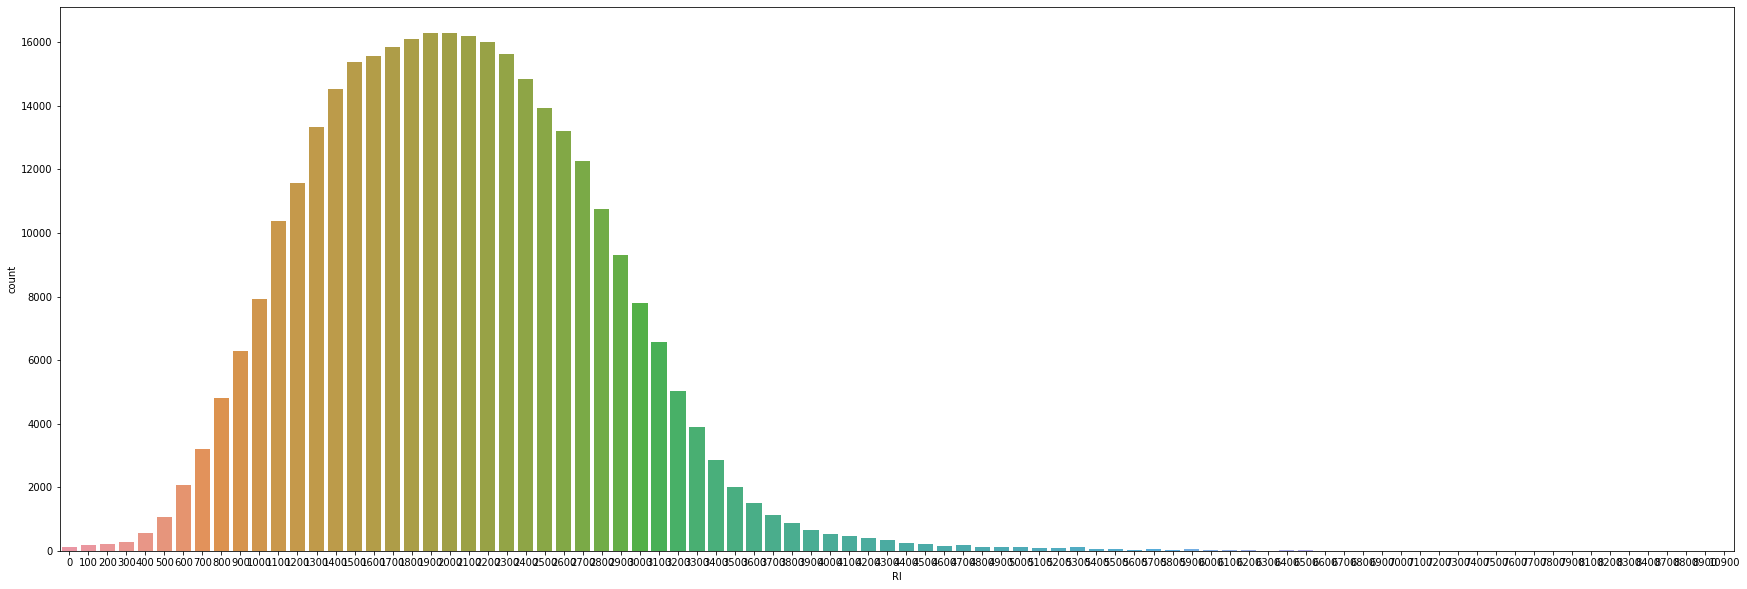

In [23]:
from collections import Counter
binned = (np.array(indcs)//100)*100
#Counter(indcs).items()
plt.figure(figsize=(30,10))
sns.countplot(binned)
plt.xlabel("RI")
plt.savefig(f"figures/{kind}/all_RI.pdf")

In [24]:
len(spectrums_all)

350618

In [31]:
n_mw = 0
mws = []
for i, spec in enumerate(spectrums_all):
    if "mw" in spec.metadata:
        #print(spec.metadata["comment"])
        # print(spec.metadata["comment"].split("|")[-2])
        mws.append(int(spec.metadata["mw"]))
        n_mw += 1

In [32]:
spectrums_all[0].metadata

{'name': 'Hydrogen',
 'formula': 'H2',
 'mw': '2',
 'casno': '1333-74-0',
 'id': '1',
 'comment': 'NIST MS# 245692, Seq# M1',
 'inchi': 'InChI=1S/H2/h1H',
 'inchikey': 'UFHFLCQGNIYNRP-UHFFFAOYSA-N',
 'iupac_name': 'molecular hydrogen',
 'smiles': '[HH]',
 'num peaks': '2'}

/storage/brno6/home/xstary1/.local-Pytorch-21.SIF/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


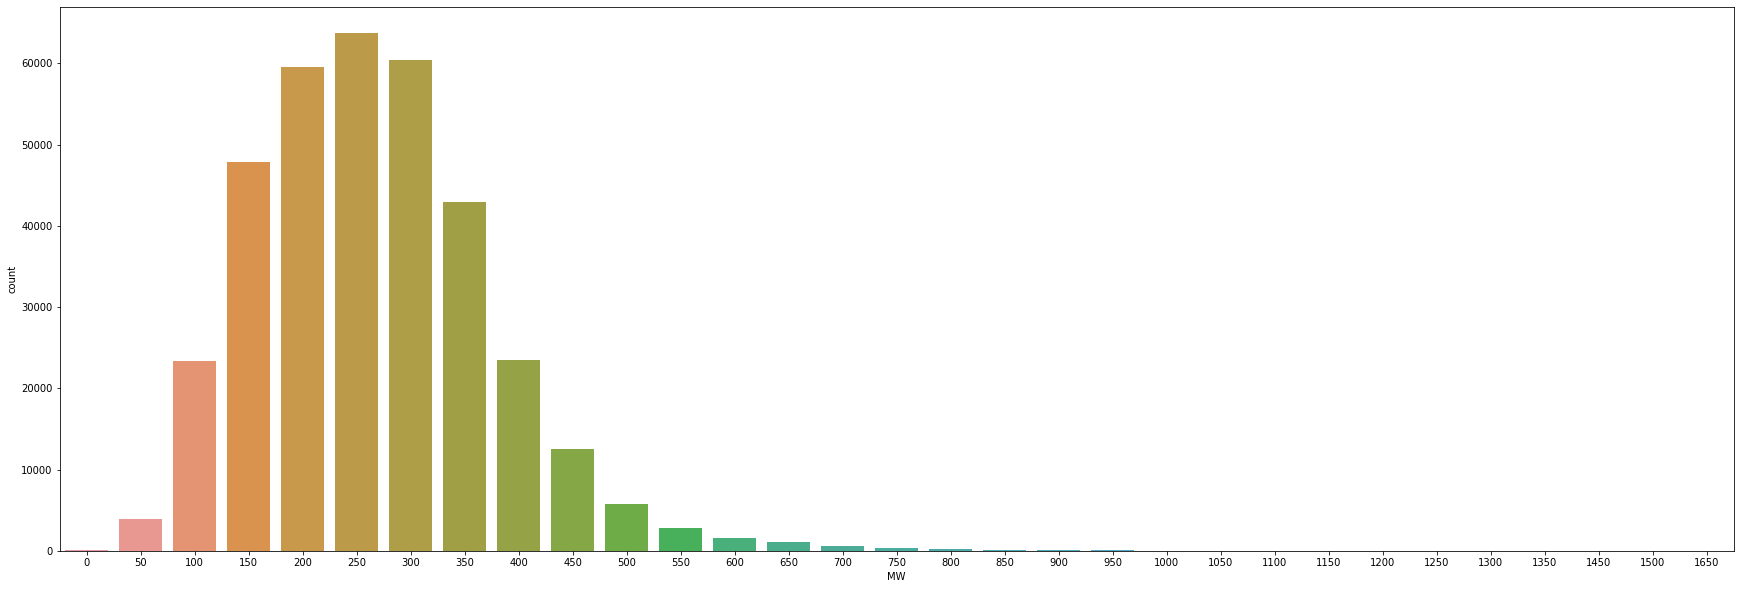

In [35]:
from collections import Counter
binned = (np.array(mws)//50)*50
#Counter(indcs).items()
plt.figure(figsize=(30,10))
sns.countplot(binned)
plt.xlabel("MW")
plt.savefig(f"figures/{kind}/all_MW.pdf")

In [37]:
spectrums_val = [*load_from_msp(data_val_path)]

In [38]:
n_RI = 0
indcs = []
for i, spec in enumerate(spectrums_val):
    if "comment" in spec.metadata and "RI" in spec.metadata["comment"]:
        #print(spec.metadata["comment"])
        # print(spec.metadata["comment"].split("|")[-2])
        indcs.append(int(spec.metadata["comment"].split("|")[-2][3:]))
        n_RI += 1
    # if i ==100:
    #     break

/storage/brno6/home/xstary1/.local-Pytorch-21.SIF/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


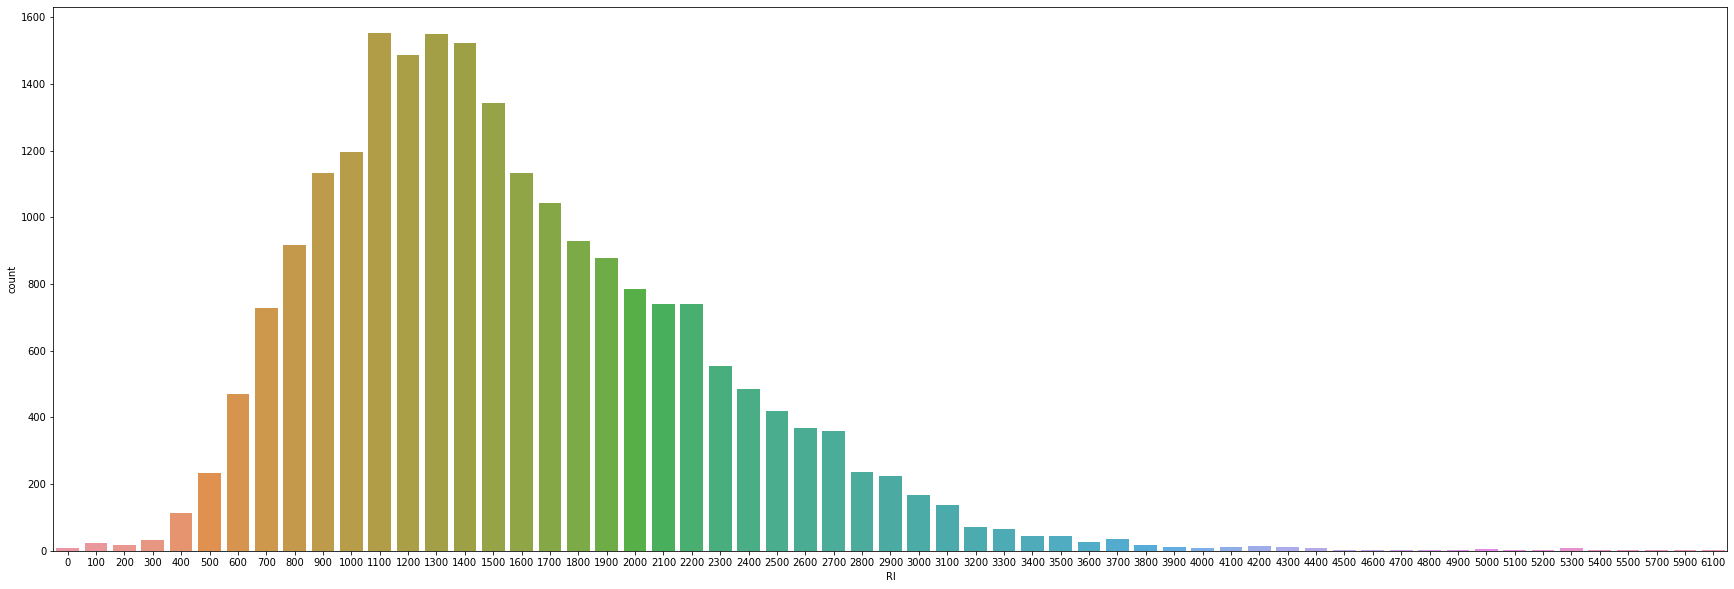

In [39]:
from collections import Counter
binned = (np.array(indcs)//100)*100
#Counter(indcs).items()
plt.figure(figsize=(30,10))
sns.countplot(binned)
plt.xlabel("RI")
plt.savefig(f"figures/{kind}/val_RI.pdf")

In [40]:
n_mw = 0
mws = []
for i, spec in enumerate(spectrums_val):
    if "mw" in spec.metadata:
        #print(spec.metadata["comment"])
        # print(spec.metadata["comment"].split("|")[-2])
        mws.append(int(spec.metadata["mw"]))
        n_mw += 1

/storage/brno6/home/xstary1/.local-Pytorch-21.SIF/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


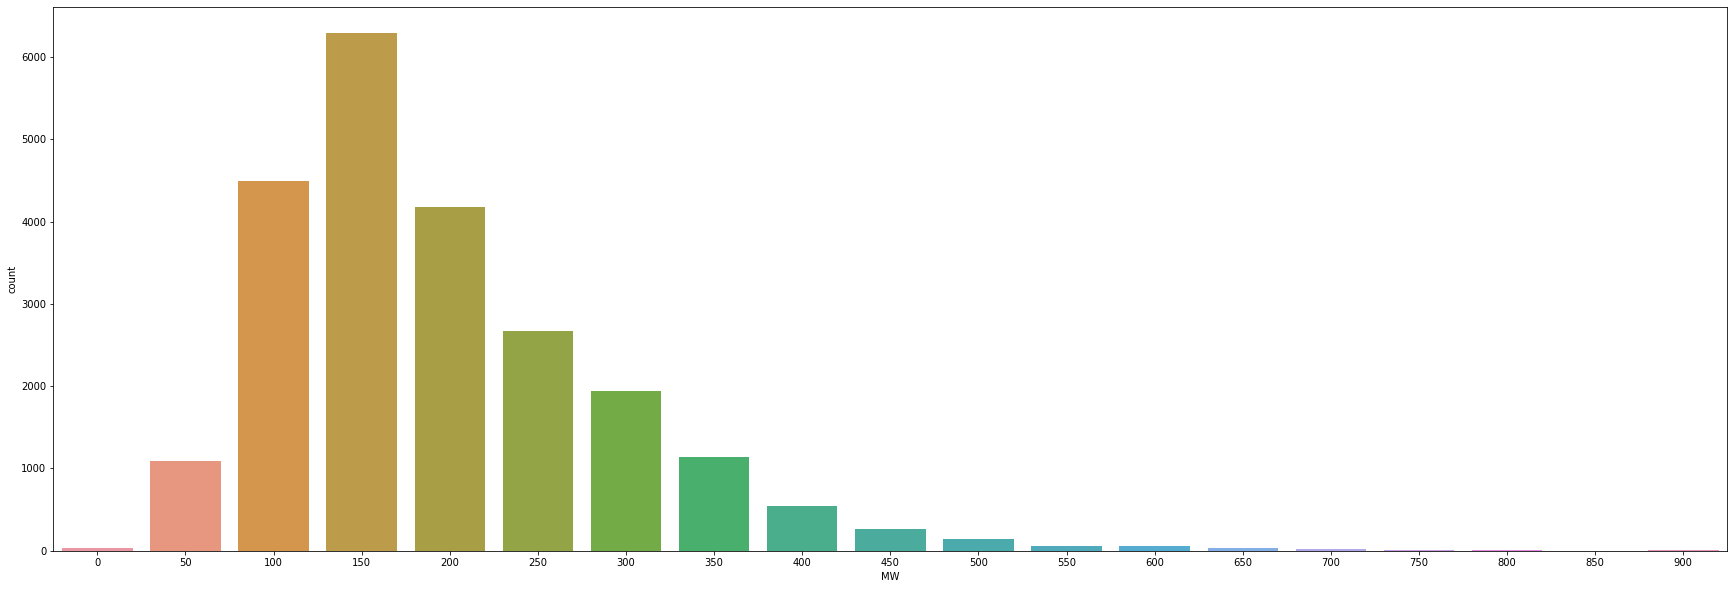

In [41]:
from collections import Counter
binned = (np.array(mws)//50)*50
#Counter(indcs).items()
plt.figure(figsize=(30,10))
sns.countplot(binned)
plt.xlabel("MW")
plt.savefig(f"figures/{kind}/val_MW.pdf")

In [42]:
spectrums_train = [*load_from_msp(data_train_path)]

In [43]:
n_RI = 0
indcs = []
for i, spec in enumerate(spectrums_train):
    if "comment" in spec.metadata and "RI" in spec.metadata["comment"]:
        #print(spec.metadata["comment"])
        # print(spec.metadata["comment"].split("|")[-2])
        indcs.append(int(spec.metadata["comment"].split("|")[-2][3:]))
        n_RI += 1
    # if i ==100:
    #     break

/storage/brno6/home/xstary1/.local-Pytorch-21.SIF/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


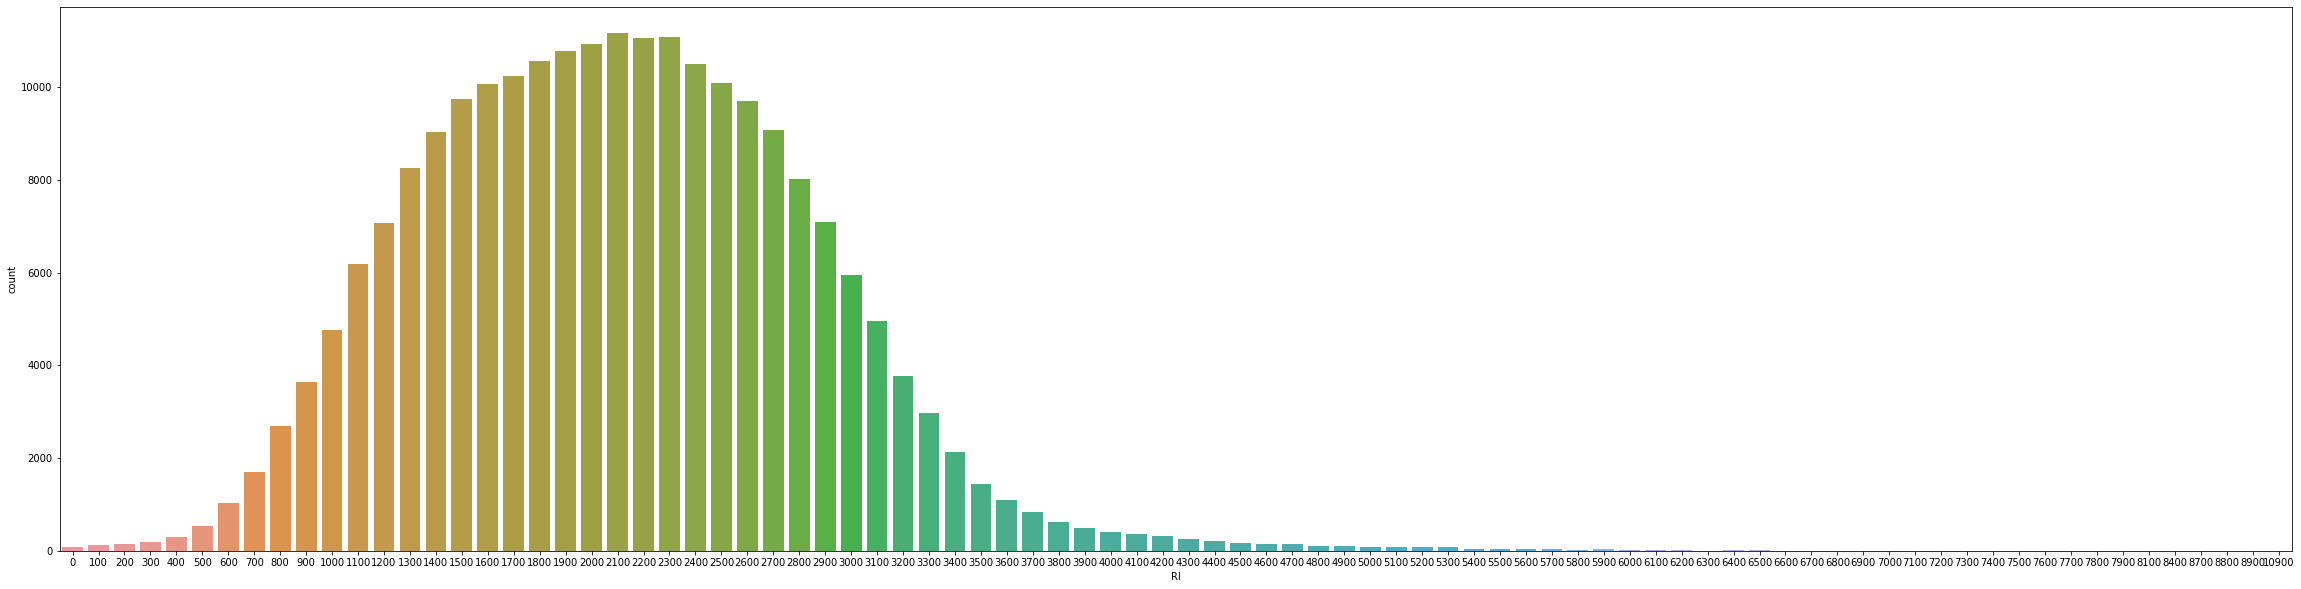

In [44]:
from collections import Counter
binned = (np.array(indcs)//100)*100
#Counter(indcs).items()
plt.figure(figsize=(40,10))
sns.countplot(binned)
plt.xlabel("RI")
plt.savefig(f"figures/{kind}/train_RI.pdf")

In [45]:
n_mw = 0
mws = []
for i, spec in enumerate(spectrums_train):
    if "mw" in spec.metadata:
        #print(spec.metadata["comment"])
        # print(spec.metadata["comment"].split("|")[-2])
        mws.append(int(spec.metadata["mw"]))
        n_mw += 1

/storage/brno6/home/xstary1/.local-Pytorch-21.SIF/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


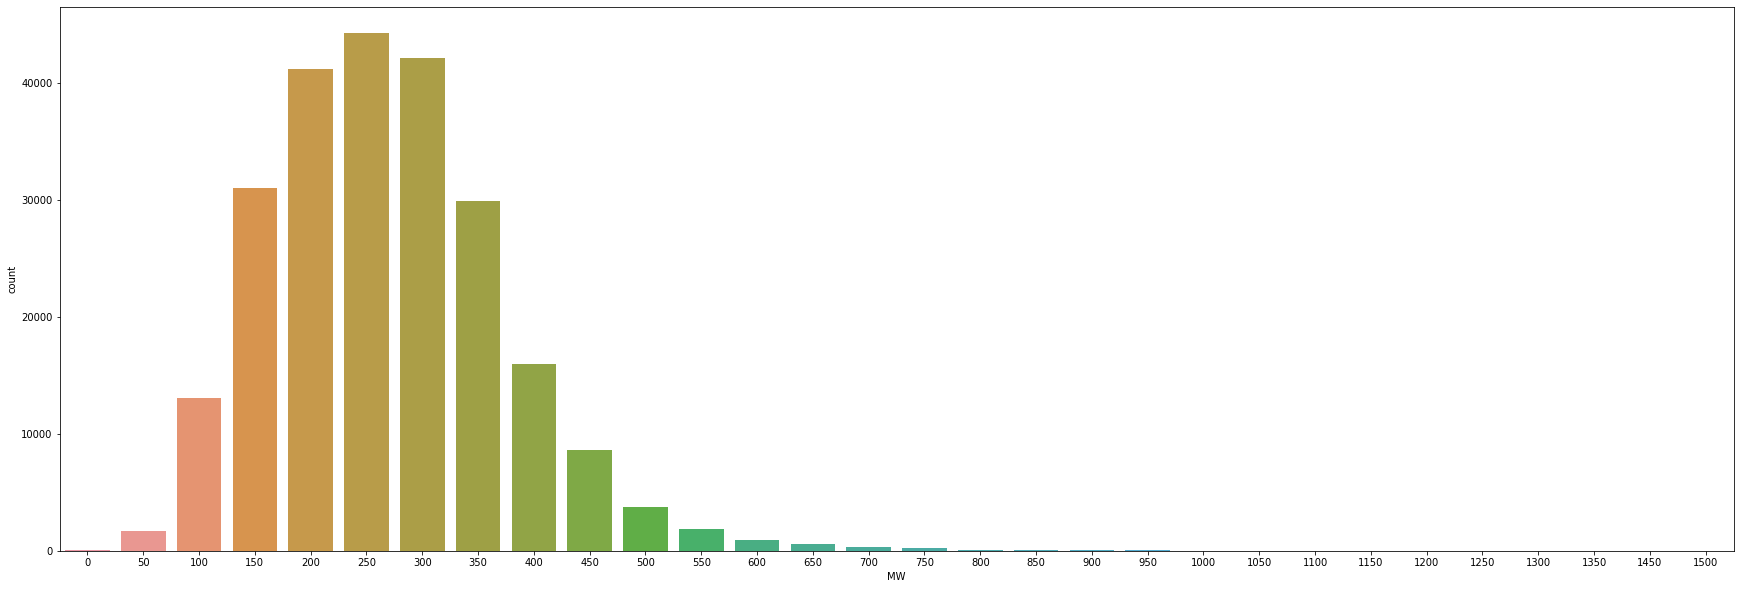

In [46]:
from collections import Counter
binned = (np.array(mws)//50)*50
#Counter(indcs).items()
plt.figure(figsize=(30,10))
sns.countplot(binned)
plt.xlabel("MW")
plt.savefig(f"figures/{kind}/val_MW.pdf")

In [157]:
n_RI
len(indcs), max(indcs), min(indcs)

(222967, 10942, 3)

In [67]:
grouped_by_RI = [[] for _ in range(max(indcs)+1)]

In [68]:
for i, spec in enumerate(spectrums_val):
    if "comment" in spec.metadata and "RI" in spec.metadata["comment"]:
        RI = int(spec.metadata["comment"].split("|")[-2][3:])
        grouped_by_RI[RI] += [spec]
        
        #n_RI += 1
   

In [69]:
RI_by_GC = grouped_by_RI[500:3500]

In [70]:
sum(map(len, RI_by_GC))

21514

In [96]:
from helpers import get_mz_vector
import seaborn as sns
import matplotlib.pyplot as plt

UIYCHXAGWOYNNA
SHQSVMDWKBRBGB
UPSXAPQYNGXVBF
YTKRILODNOEEPX
HTCOCLGRYILICZ
FXXACINHVKSMDR
QKYWADPCTHTJHQ
VVQNEPGJFQJSBK
AORMDLNPRGXHHL
ICSWLKDKQBNKAY
SJNALLRHIVGIBI
XNLICIUVMPYHGG
FDPIMTJIUBPUKL
GOBGVVAHHOUMDK
ZDWYFWIBTZJGOR


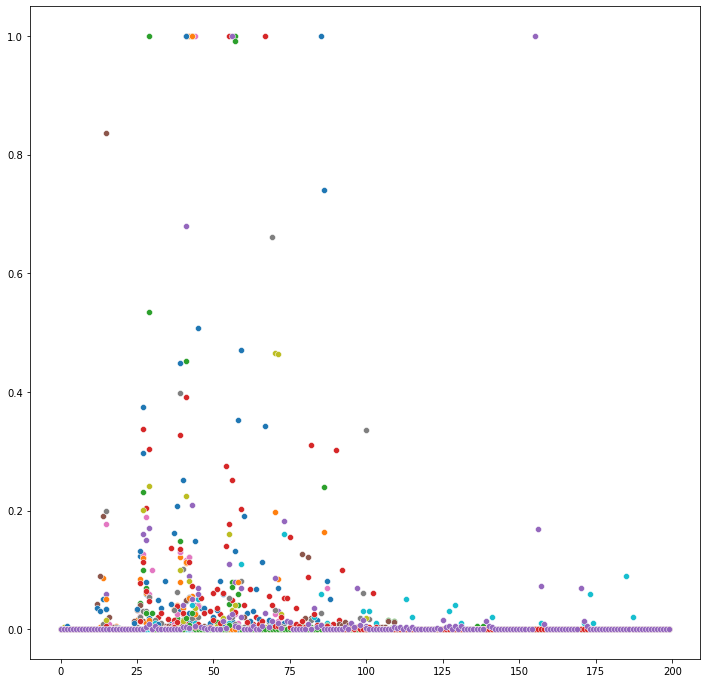

In [117]:
mzs = []

plt.figure(figsize=(12,12))
names= set()
for spec in [item for sublist in RI_by_GC[150:155] for item in sublist]: 
    spec = spectrum_processing(spec)
    name = spec.metadata["inchikey"].split("-")[0]
    if name in names:
        continue
    names.add(name)
    print(name)
    #spec.plot()
    focused = get_mz_vector(spec)[:200]
    sns.scatterplot(y=focused, x=np.arange(200))
    mzs.append(get_mz_vector(spec))

In [120]:
amzs = np.array(mzs)
big = amzs > 0.00

for i in range(len(big)):
    for j in range(i):
        print(sum(big[i] & big[j]))

30
36
30
26
19
23
16
13
14
9
59
35
52
30
16
37
25
28
20
16
38
51
32
42
25
17
70
37
43
29
33
21
16
52
33
47
10
3
6
2
5
14
8
13
11
40
33
35
23
14
45
30
40
39
6
13
11
11
7
10
12
12
13
13
2
11
12
9
11
6
9
12
12
13
12
3
11
8
53
27
38
25
17
68
36
62
49
14
38
13
13
41
18
37
20
15
61
29
53
38
23
25
10
12
54
